In [9]:
%matplotlib inline
%load_ext memory_profiler

import pandas as pd
import os
import glob
import pickle
import phate
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime
import scanpy as sc
from scipy import sparse
import scprep

# settings
plt.rc('font', size = 9)
plt.rc('font', family='sans serif')
plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42
plt.rcParams['text.usetex']=False
plt.rcParams['legend.frameon']=False
plt.rcParams['axes.grid']=False
plt.rcParams['legend.markerscale']=0.5
sc.set_figure_params(dpi=300,dpi_save=600,
                     frameon=False,
                     fontsize=9)
plt.rcParams['savefig.dpi']=600
sc.settings.verbosity=2
sc._settings.ScanpyConfig.n_jobs=-1
sns.set_style("ticks")



The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [54]:
%%memit

adata_file1 = '/home/ngr4/project/scnd/data/processed/hum_ctrl.h5ad'
adata_file2 = '/home/ngr4/project/scnd/data/processed/hum_sca1.h5ad'
hdata = sc.read(adata_file1).concatenate(sc.read(adata_file2), batch_key='genotype', batch_categories=['CTRL', 'SCA1'])

peak memory: 64517.49 MiB, increment: 40289.54 MiB


In [55]:
# color map in order 
cmap_ctype_hum={'Granule cells': '#FAC18A',
                'IN1': '#F9EBAE',
                'IN2': '#88BB92',
                'Astrocytes': '#F9AEAE',
                'Bergmann glia': '#AEB7F9',
                'Oligodendrocyte progenitor cells': '#F1815F',
                'Oligodendrocytes': '#75A3B7',
                'Microglia': '#AC5861',
                'Pericytes': '#2D284B',
                'Endothelial cells': '#1C67EE', 
                'Unipolar brush cells': '#BA61BA',
                'Purkinje cells': '#EE5264',
                }
# hdata.uns['ctype_colors']=np.array(list(cmap_ctype_hum.values()),dtype=object)
# hdata.obs['ctype'].cat.reorder_categories(new_categories=list(cmap_ctype_hum.keys()),
#                                          inplace=True,ordered=True)

cmap_ctype={'Granule cell': '#FAC18A',
            'Unipolar brush cells': '#BA61BA',
            'Purkinje cells': '#EE5264',
            'GABAergic interneuron 1': '#F9EBAE',
            'GABAergic interneuron 2': '#88BB92',
            'GABAergic interneuron 3': '#46A928',
            'Astrocyte': '#F9AEAE',
            'Bergmann glia': '#AEB7F9',
            'Oligodendrocyte progenitor cell': '#F1815F',
            'Oligodendrocyte': '#75A3B7',
            'Microglia': '#AC5861',
            'Pericytes': '#2D284B',
            'Endothelial cells': '#1C67EE'}
# mdata.uns['ctype_colors']=np.array(list(cmap_ctype.values()),dtype=object)
# mdata.obs['ctype'].cat.reorder_categories(new_categories=list(cmap_ctype.keys()),
#                                          inplace=True,ordered=True)

In [56]:
pfp = '/home/ngr4/project/scnd/results/'

In [63]:
sc.tl.pca(hdata, n_comps=50)
sc.external.pp.bbknn(hdata, n_pcs=50, neighbors_within_batch=int(30/len(hdata.obs.batch.unique())))
sc.tl.umap(hdata)

computing PCA
    with n_comps=50
    finished (0:01:42)
computing batch balanced neighbors
	finished (0:00:22)
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/bbknn/__init__.py:294: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['distances'] = bbknn_out[0]
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/bbknn/__init__.py:295: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'] = bbknn_out[1]
computing UMAP
    finished (0:01:49)


/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/scprep/select.py:333: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(data, pd.SparseDataFrame):
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/scprep/utils.py:191: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(x, pd.SparseDataFrame):
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/scprep/utils.py:193: FutureWarning: The SparseSeries class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif isinstance(x, pd.SparseSeries):


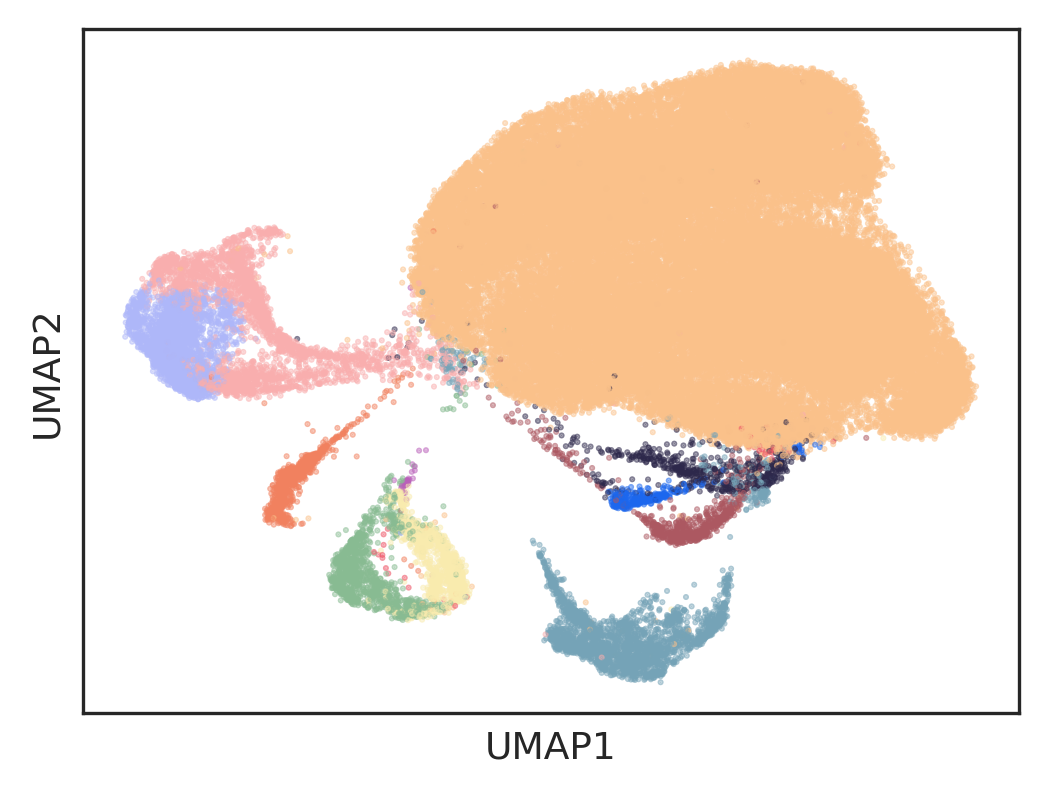

In [64]:
# human
fig,ax=plt.subplots(1,1,figsize=(4,3))
scprep.plot.scatter2d(hdata.obsm['X_umap'],
                      c=hdata.obs['ctype'],
                      cmap=cmap_ctype_hum,
                      ticks=None,
                      label_prefix='UMAP',
                      legend=False,
                      ax=ax,
                      s = 0.2,
                      alpha=0.6,
                      rasterized=True)
# scprep.plot.scatter2d(hdata.obsm['X_phate'],
#                       c=hdata.obs['ctype'],
#                       cmap=cmap_ctype_hum,
#                       ticks=None,
#                       label_prefix='PHATE',
#                       legend=True,
#                       legend_loc=(1.01,0.1),
#                       ax=ax[1],
#                       s = 0.2,
#                       alpha=0.6,
#                       rasterized=True)
if True :
    fig.savefig(os.path.join(pfp,'embeds_hum_updated_ctype.pdf'),dpi=600,bbox_inches='tight')

In [67]:
sc.settings.figdir = pfp

In [65]:
markersoi = [
    'GABRA6', 'SLC17A7', 'SLC17A6', 'EOMES', 
    'ATP2A3', 'CALB1', 'CA8', 'PPP1R17', 'SLC1A6', 
    'GAD1', 'GAD2', 'NTN1', 'MEGF10', 'ALDH1L1', 'AQP4',
    'GDF10', 'HOPX', 'OLIG1', 'OLIG2', 'PDGFRA',
    'HAPLN2', 'MAG', 'MOG', 'OPALIN', 'C1QB', 
    'CX3CR1', 'DOCK2', 'P2RY12', 'FLT1', 'RGS5', 'DCN', 'LUM', 'KDR'
]

... storing 'batch' as categorical
... storing 'Sample' as categorical
... storing 'Condition' as categorical


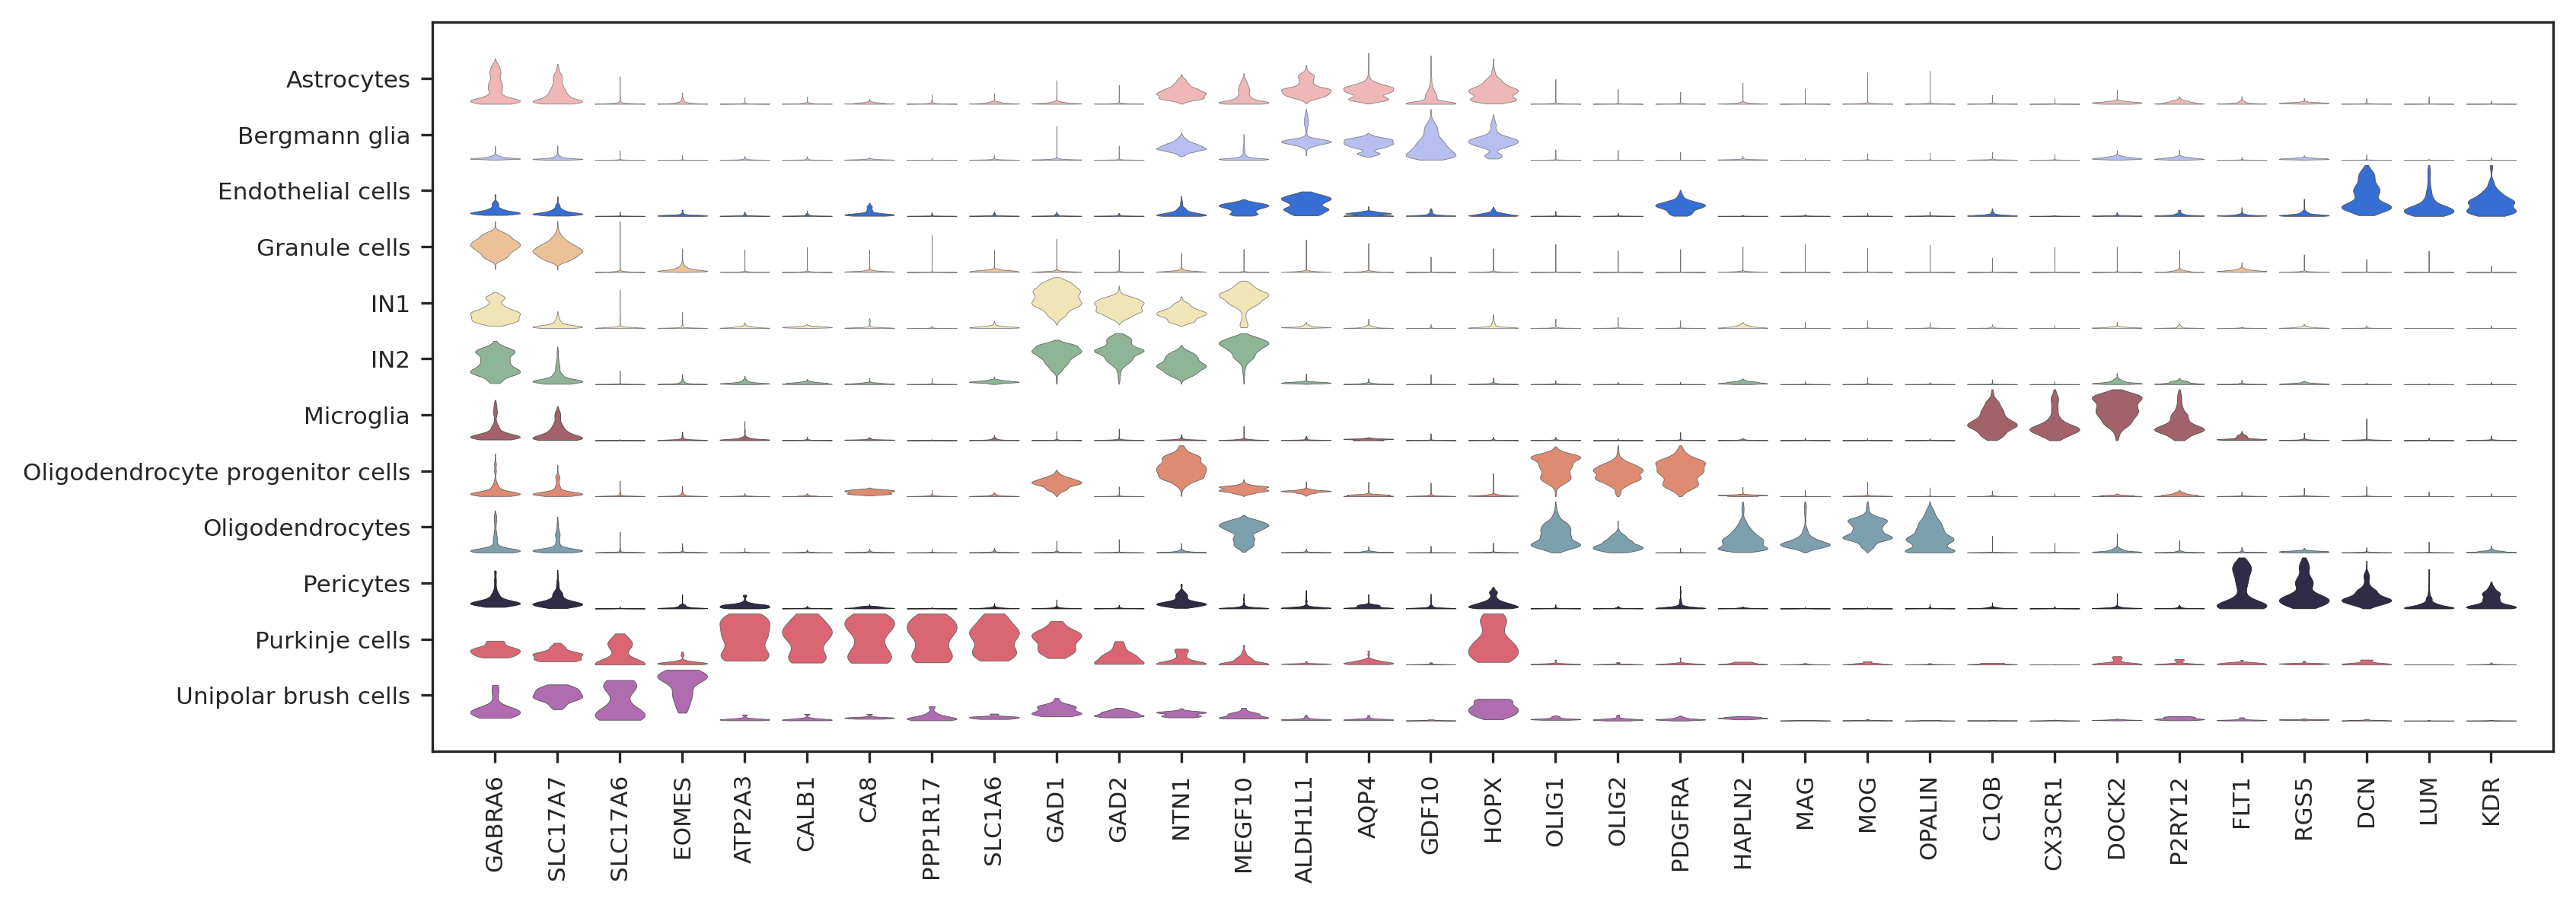

In [66]:
## human plot
sc.pl.stacked_violin(hdata,markersoi,
                     groupby='ctype',
                     use_raw=False,
                     layer='imputed',
                     standard_scale='var',
                     var_group_rotation=90,
                     row_palette=[cmap_ctype_hum[i] for i in sorted(cmap_ctype_hum.keys())],
                     save='_hum__updated_ctype.pdf')

In [68]:
hdata

AnnData object with n_obs × n_vars = 77788 × 29179
    obs: 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pmito', 'n_genes', 'leiden', 'ctype', 'subclusters', 'IN_subcluster', 'Sample', 'Condition', 'value', 'genotype'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'imputed'
    obsp: 'distances', 'connectivities'

In [69]:
hdata.obs.groupby(['genotype', 'ctype']).count()

batch  n_genes_by_counts  \
genotype ctype                                                        
CTRL     Astrocytes                         1285               1285   
         Bergmann glia                       775                775   
         Endothelial cells                   116                116   
         Granule cells                     36545              36545   
         IN1                                 498                498   
         IN2                                 872                872   
         Microglia                           210                210   
         Oligodendrocyte progenitor cells    392                392   
         Oligodendrocytes                   1550               1550   
         Pericytes                           262                262   
         Purkinje cells                       30                 30   
         Unipolar brush cells                 21                 21   
SCA1     Astrocytes                         1621               1621   
         Bergmann glia                      1552               1552   
         Endothelial cells                   187                187   
         Granule cells                     28768              28768   
         IN1                                 541                541   
         IN2                                 367                367   
         Microglia                           465                465   
         Oligodendrocyte progenitor cells    421                421   
         Oligodendrocytes                    951                951   
         Pericytes                           327                327   
         Purkinje cells                       15                 15   
         Unipolar brush cells                 17                 17   

                                           log1p_n_genes_by_counts  \
genotype ctype                                                       
CTRL     Astrocytes                                           1285   
         Bergmann glia                                         775   
         Endothelial cells                                     116   
         Granule cells                                       36545   
         IN1                                                   498   
         IN2                                                   872   
         Microglia                                             210   
         Oligodendrocyte progenitor cells                      392   
         Oligodendrocytes                                     1550   
         Pericytes                                             262   
         Purkinje cells                                         30   
         Unipolar brush cells                                   21   
SCA1     Astrocytes                                           1621   
         Bergmann glia                                        1552   
         Endothelial cells                                     187   
         Granule cells                                       28768   
         IN1                                                   541   
         IN2                                                   367   
         Microglia                                             465   
         Oligodendrocyte progenitor cells                      421   
         Oligodendrocytes                                      951   
         Pericytes                                             327   
         Purkinje cells                                         15   
         Unipolar brush cells                                   17   

                                           total_counts  log1p_total_counts  \
genotype ctype                                                                
CTRL     Astrocytes                                1285                1285   
         Bergmann glia                              775                 775   
         Endothelial cells                          116    